# Modelo de regressão linear vendas

**Previsão com as melhores vendas**

**Algoritmos** Floresta randômica, Naive bayes.

**Regressão linear**: RMSE, MAE, MSE.

**Analise exploratória de dados**:
Analise das ações com graficos boxplot

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
x = np.array([[18], [23], [28], [33], [38], [43], [48], [53], [58], [63]])
y = np.array([[871], [1132], [1042], [1356], [1488], [1638], [1569], [1754], [1866], [1900]])

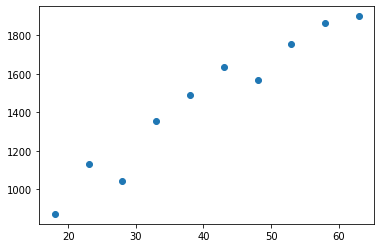

In [3]:
plt.scatter(x, y)

In [4]:
x = np.array(x).reshape(len(x), 1)

In [5]:
y = np.array(y).reshape(len(y), 1)

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [8]:
from sklearn.ensemble import RandomForestClassifier

x1 = RandomForestClassifier(n_estimators=100)
x1.fit(x, x)
x1_score = x1.score(x, y)
x2_predict = x1.predict(x)
x2_predict

C:\Users\RafaelHenriqueGallo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63])

In [9]:
from sklearn.naive_bayes import GaussianNB

naive = GaussianNB()
naive.fit(x, y)
naive_score = naive.score(x, y)
naive_pred = naive.predict(x)
naive_score

C:\Users\RafaelHenriqueGallo\Anaconda\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

In [10]:
naive_pred

array([ 871, 1132, 1042, 1356, 1488, 1638, 1569, 1754, 1866, 1900])

In [11]:
from sklearn.linear_model import LinearRegression

regressao = LinearRegression()
regressao.fit(x, y)
regressao.intercept_

array([541.24363636])

In [12]:
modelo_1 = LinearRegression()
modelo_1.fit(x, y)

modelo_1.score(x, y)

0.9432124891075881

In [13]:
regressao.coef_

array([[22.72484848]])

In [14]:
regressao.intercept_

array([541.24363636])

In [15]:
regressao.coef_ * 32.74456356 + regressao.intercept_

array([[1285.35888197]])

In [16]:
previsao = regressao.intercept_ + regressao.coef_ * 40
previsao

array([[1450.23757576]])

Text(0, 0.5, 'Anos')

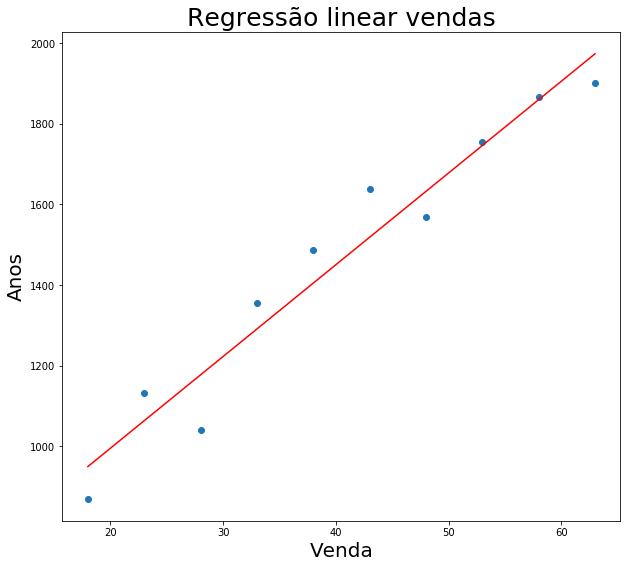

In [17]:
fig = plt.figure(figsize=(10, 9))

plt.scatter(x, y)
plt.plot(x, regressao.predict(x), color = "red")
plt.title("Regressão linear vendas", fontsize= 25)
plt.xlabel("Venda", fontsize= 20)
plt.ylabel("Anos", fontsize= 20)

**RMSE**

In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = np.sqrt(mean_squared_error(x, y))
print("Erro quadrático média da raiz: %.2f" % (rmse))

Erro quadrático média da raiz: 1457.15


**MAE**

In [19]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(x, y)
print("Erro médio absoluto: %.2f" % (mae))

Erro médio absoluto: 1421.10


**MSE**

In [20]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(x, y)
print("Erro médio quadrático: %.2f" % (mse))

Erro médio quadrático: 2123281.50


# Previsão

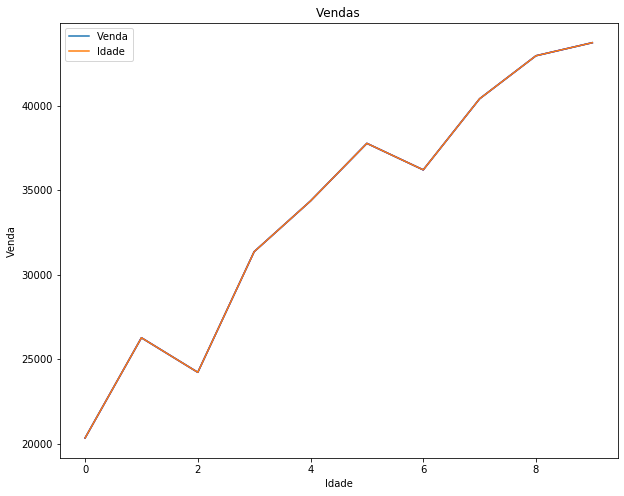

In [21]:
from sklearn.linear_model import LinearRegression
pre1 = regressao.predict(x)
pre2 = regressao.predict(y)

plt.figure(figsize=(10, 8))
plt.plot(pre2, label = 'Venda')
plt.plot(pre2, markersize = 10, color = 'blue')
plt.plot(pre2, label = 'Idade')
plt.title("Vendas")
plt.xlabel("Idade")
plt.ylabel("Venda")
plt.legend()